## New data Predictions

**Note**: Run the data pipeline activity to ensure this notebook is making predictions on new data under /Lakehouse/Files/new/ folder. The pipeline activity runs data from data staged in the raw folder.

In [1]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date

# Set float display to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Wranings 
import warnings
warnings.filterwarnings('ignore')

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 3, Finished, Available, Finished)

### Read Data

In [294]:
# Read data 
new_df = pd.read_parquet("/lakehouse/default/Files/new/week_31_data.parquet")
new_df.head()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 296, Finished, Available, Finished)

,hvfhs_license_num,pickup_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,cbd_congestion_fee,week_number
0,HV0003,2025-07-28 00:15:25,1.25,832,29.95,0.00,0.71,2.64,2.75,0.00,0.00,27.15,N,N,N,N,N,1.50,31
1,HV0003,2025-07-28 00:34:49,3.15,981,38.26,0.00,0.94,3.48,2.75,0.00,0.00,22.63,N,N,N,N,N,1.50,31
2,HV0003,2025-07-28 00:21:29,2.58,574,13.52,0.00,0.34,1.22,0.00,0.00,0.00,9.44,N,N,N,N,N,0.00,31
3,HV0003,2025-07-28 00:36:20,3.18,930,14.42,0.00,0.36,1.28,0.00,0.00,0.00,13.87,N,N,N,N,N,0.00,31
4,HV0003,2025-07-28 00:10:02,5.66,1740,51.58,0.00,1.29,4.58,2.75,0.00,0.00,26.48,N,N,N,N,N,0.00,31


In [295]:
# Shape 
print ("Shape of new data:" ,new_df.shape)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 297, Finished, Available, Finished)

Shape of new data: (2547263, 19)


#### Data Quality

In [296]:
# Describe
new_df.describe()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 298, Finished, Available, Finished)

,pickup_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,cbd_congestion_fee,week_number
count,2547263,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00
mean,2025-07-30 03:28:43.935421952,4.97,1217.44,27.66,1.08,0.69,2.30,1.01,0.23,1.31,21.13,0.53,31.00
min,2025-07-28 00:00:00,0.00,1.00,-28.18,0.00,0.00,0.00,0.00,0.00,0.00,-4.68,0.00,31.00
25%,2025-07-29 05:56:52.500000,1.50,591.00,12.11,0.00,0.29,1.00,0.00,0.00,0.00,9.04,0.00,31.00
50%,2025-07-30 06:17:32,2.91,975.00,19.36,0.00,0.47,1.62,0.00,0.00,0.00,15.56,0.00,31.00
75%,2025-07-31 04:20:09,6.21,1568.00,33.04,0.00,0.82,2.82,2.75,0.00,0.00,26.73,1.50,31.00
max,2025-07-31 23:59:59,286.17,27572.00,1250.43,62.55,31.22,88.30,5.50,7.25,197.17,918.68,3.00,31.00
std,NaN,6.02,912.55,26.89,3.55,0.70,2.18,1.32,0.72,3.86,19.23,0.72,0.00


In [297]:
# Filter out 0, negative driver pay
new_df = new_df[new_df['driver_pay'] > 0]

# Filter out 0, negative base passenger fare
new_df = new_df[new_df['base_passenger_fare'] > 0]

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 299, Finished, Available, Finished)

In [298]:
# Nulls? 
new_df.isna().sum()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 300, Finished, Available, Finished)

hvfhs_license_num       0
pickup_datetime         0
trip_miles              0
trip_time               0
base_passenger_fare     0
tolls                   0
bcf                     0
sales_tax               0
congestion_surcharge    0
airport_fee             0
tips                    0
driver_pay              0
shared_request_flag     0
shared_match_flag       0
access_a_ride_flag      0
wav_request_flag        0
wav_match_flag          0
cbd_congestion_fee      0
week_number             0
dtype: int64

In [299]:
# Info 
new_df.info()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 301, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 2546015 entries, 0 to 2547262
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   pickup_datetime       datetime64[ns]
 2   trip_miles            float64       
 3   trip_time             int64         
 4   base_passenger_fare   float64       
 5   tolls                 float64       
 6   bcf                   float64       
 7   sales_tax             float64       
 8   congestion_surcharge  float64       
 9   airport_fee           float64       
 10  tips                  float64       
 11  driver_pay            float64       
 12  shared_request_flag   object        
 13  shared_match_flag     object        
 14  access_a_ride_flag    object        
 15  wav_request_flag      object        
 16  wav_match_flag        object        
 17  cbd_congestion_fee    float64       
 18  week_number           UInt32        
dtypes: UI

In [300]:
new_df.select_dtypes(['float64', 'int64']).describe()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 302, Finished, Available, Finished)

,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,cbd_congestion_fee
count,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00
mean,4.97,1217.74,27.67,1.08,0.69,2.30,1.01,0.23,1.31,21.14,0.53
std,6.03,912.49,26.90,3.55,0.70,2.18,1.32,0.72,3.86,19.23,0.72
min,0.00,1.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
25%,1.50,592.00,12.11,0.00,0.29,1.00,0.00,0.00,0.00,9.05,0.00
50%,2.91,975.00,19.37,0.00,0.47,1.62,0.00,0.00,0.00,15.57,0.00
75%,6.21,1568.00,33.05,0.00,0.82,2.82,2.75,0.00,0.00,26.74,1.50
max,286.17,27572.00,1250.43,62.55,31.22,88.30,5.50,7.25,197.17,918.68,3.00


In [301]:
# Shape 
print("Shape of new_df:" ,new_df.shape)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 303, Finished, Available, Finished)

Shape of new_df: (2546015, 19)


### Derived Features

In [302]:
# Time-based features
new_df['pickup_hour'] = new_df['pickup_datetime'].dt.hour
new_df['pickup_dayofweek'] = new_df['pickup_datetime'].dt.dayofweek
new_df['is_weekend'] = new_df['pickup_dayofweek'].isin([5, 6]).astype(int)
new_df['time_of_day'] = pd.cut(new_df['pickup_hour'], bins=[0,6,12,18,24], 
        labels=['Night','Morning','Afternoon','Evening'], right=False)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 304, Finished, Available, Finished)

In [303]:
# Columns 
new_df.columns

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 305, Finished, Available, Finished)

Index(['hvfhs_license_num', 'pickup_datetime', 'trip_miles', 'trip_time',
       'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'cbd_congestion_fee',
       'week_number', 'pickup_hour', 'pickup_dayofweek', 'is_weekend',
       'time_of_day'],
      dtype='object')

In [304]:
new_df.is_weekend.value_counts()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 306, Finished, Available, Finished)

is_weekend
0    2546015
Name: count, dtype: int64

In [305]:
new_df.pickup_datetime.value_counts()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 307, Finished, Available, Finished)

pickup_datetime
2025-07-29 09:00:00    45
2025-07-28 05:00:00    43
2025-07-28 08:30:00    42
2025-07-29 08:00:00    42
2025-07-30 09:00:00    41
                       ..
2025-07-29 03:48:51     1
2025-07-31 00:54:39     1
2025-07-29 03:30:44     1
2025-07-29 03:21:52     1
2025-07-31 23:28:49     1
Name: count, Length: 337264, dtype: int64

In [306]:
# Shape 
new_df.shape

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 308, Finished, Available, Finished)

(2546015, 23)

### 1/0 encoding 
for flag columns

In [307]:
# Set columns
columns_for_mapping = ['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 
                        'wav_request_flag', 'wav_match_flag']

# Mapping features with Y/N to 1/0
mapping = {'Y': 1, 'N': 0}

# Loop through columns, map to new values from dic
for col in columns_for_mapping: 
    new_df[col] = new_df[col].map(mapping)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 309, Finished, Available, Finished)

In [308]:
# Inspect rows 
display(new_df)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 310, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 6904b2f5-0e30-47d3-8139-c396c06fcafa)

### Feature Engineering

In [309]:
# new df
new_df1 = new_df.copy()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 311, Finished, Available, Finished)

#### Feature Selection

In [310]:
# Columns 
new_df1.columns

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 312, Finished, Available, Finished)

Index(['hvfhs_license_num', 'pickup_datetime', 'trip_miles', 'trip_time',
       'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'cbd_congestion_fee',
       'week_number', 'pickup_hour', 'pickup_dayofweek', 'is_weekend',
       'time_of_day'],
      dtype='object')

In [311]:
# Drop features 
new_df1.drop(['hvfhs_license_num', 'trip_time' , 'pickup_datetime', 'tolls', 
        'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips', 
        'shared_request_flag', 'wav_request_flag', 'week_number', 
        'cbd_congestion_fee', 'pickup_dayofweek', 'pickup_hour'], axis=1, inplace=True)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 313, Finished, Available, Finished)

In [312]:
# Info 
new_df1.info()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 314, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 2546015 entries, 0 to 2547262
Data columns (total 9 columns):
 #   Column               Dtype   
---  ------               -----   
 0   trip_miles           float64 
 1   base_passenger_fare  float64 
 2   bcf                  float64 
 3   driver_pay           float64 
 4   shared_match_flag    int64   
 5   access_a_ride_flag   int64   
 6   wav_match_flag       int64   
 7   is_weekend           int64   
 8   time_of_day          category
dtypes: category(1), float64(4), int64(4)
memory usage: 177.2 MB


In [313]:
# View 
display(new_df1)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 315, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 8b788ff4-94d7-4503-8847-03f8a9bc5467)

#### Log-Transform 
Features

In [314]:
# New df
new_df2 = new_df1.copy()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 316, Finished, Available, Finished)

In [315]:
# Shape 
new_df2.shape

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 317, Finished, Available, Finished)

(2546015, 9)

In [316]:
# Set continuous features 
continuous_features = new_df2.select_dtypes('float64').columns

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 318, Finished, Available, Finished)

In [317]:
# View 
continuous_features

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 319, Finished, Available, Finished)

Index(['trip_miles', 'base_passenger_fare', 'bcf', 'driver_pay'], dtype='object')

In [318]:
# log1p transformation of continuous features
new_df2[continuous_features] = new_df2[continuous_features].apply(np.log1p)
print("Log transformation applied to columns:")
print(continuous_features)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 320, Finished, Available, Finished)

Log transformation applied to columns:
Index(['trip_miles', 'base_passenger_fare', 'bcf', 'driver_pay'], dtype='object')


In [319]:
# View df 
display(new_df2)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 321, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 3bd522f8-8f28-4031-9600-3b15a028318c)

#### Stadard Scaler
for fetaures only

In [320]:
# Copy df 
new_df3 = new_df2.copy()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 322, Finished, Available, Finished)

In [321]:
# Shape 
new_df3.shape

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 323, Finished, Available, Finished)

(2546015, 9)

In [322]:
continuous_features

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 324, Finished, Available, Finished)

Index(['trip_miles', 'base_passenger_fare', 'bcf', 'driver_pay'], dtype='object')

In [323]:
type(continuous_features)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 325, Finished, Available, Finished)

pandas.core.indexes.base.Index

In [324]:
# Set features for scaling 
scaling_features = continuous_features.drop('base_passenger_fare')
print ("continuous features:" ,continuous_features)
print ("scaling features:" ,scaling_features)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 326, Finished, Available, Finished)

continuous features: Index(['trip_miles', 'base_passenger_fare', 'bcf', 'driver_pay'], dtype='object')
scaling features: Index(['trip_miles', 'bcf', 'driver_pay'], dtype='object')


In [325]:
# Initialize Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform continuous features 
new_df3[scaling_features] = scaler.fit_transform(new_df3[scaling_features]) 

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 327, Finished, Available, Finished)

In [326]:
# Verify scaled features 
new_df3[continuous_features].describe()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 328, Finished, Available, Finished)

,trip_miles,base_passenger_fare,bcf,driver_pay
count,2546015.00,2546015.00,2546015.00,2546015.00
mean,0.00,3.10,0.00,0.00
std,1.00,0.68,1.00,1.00
min,-2.07,0.04,-1.58,-4.05
25%,-0.80,2.57,-0.73,-0.76
50%,-0.18,3.01,-0.29,-0.05
75%,0.67,3.53,0.42,0.69
max,5.80,7.13,10.00,5.71


**Note:** Driver pay is not part of Standard Scaling

#### Capping Outliers

In [327]:
# Winsorize and cap-off extreme values 
from scipy.stats.mstats import winsorize

# Copy df3
new_df3_winsorized = new_df3.copy()

# Winsorize all numeric columns at 1st and 99th percentiles
for col in new_df3_winsorized[continuous_features].columns:
    lower = new_df3_winsorized[col].quantile(0.01)
    upper = new_df3_winsorized[col].quantile(0.99)
    new_df3_winsorized[col] = new_df3_winsorized[col].clip(lower, upper)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 329, Finished, Available, Finished)

In [328]:
# Shape 
new_df3_winsorized.shape

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 330, Finished, Available, Finished)

(2546015, 9)

In [329]:
# Describe 
new_df3_winsorized[continuous_features].describe()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 331, Finished, Available, Finished)

,trip_miles,base_passenger_fare,bcf,driver_pay
count,2546015.00,2546015.00,2546015.00,2546015.00
mean,-0.00,3.09,-0.01,-0.00
std,0.99,0.67,0.97,0.99
min,-1.55,1.96,-1.17,-1.76
25%,-0.80,2.57,-0.73,-0.76
50%,-0.18,3.01,-0.29,-0.05
75%,0.67,3.53,0.42,0.69
max,2.59,4.91,3.42,2.43


StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 332, Finished, Available, Finished)

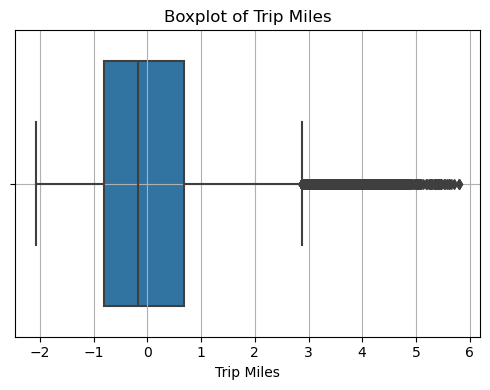

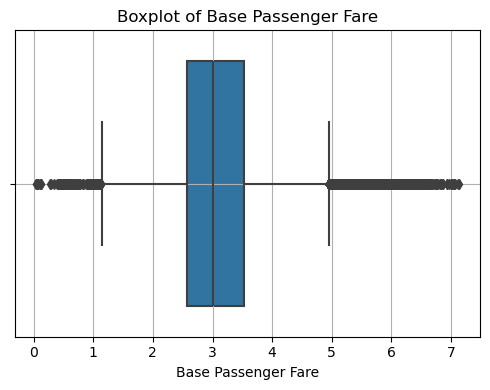

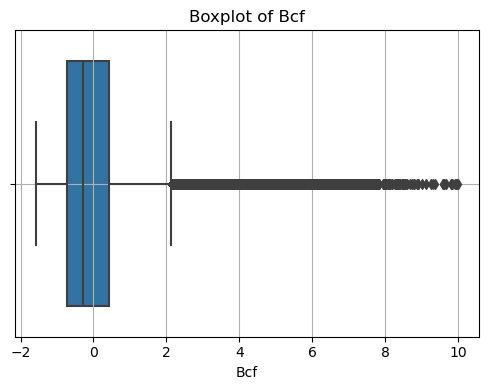

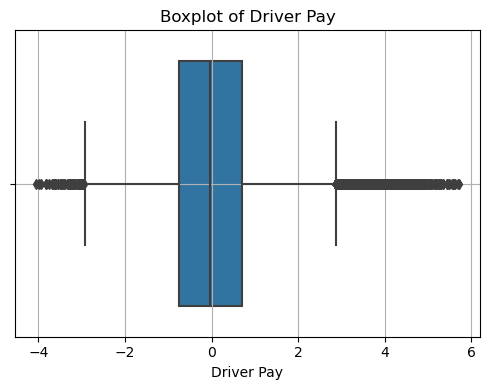

In [330]:
# Boxplots after feature transformations
for feature in continuous_features:
    plt.figure(figsize=(5, 4)) # new figure for each plot
    
    # boxplots 
    sns.boxplot(x=new_df3[feature])
    
    plt.title(f'Boxplot of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.grid(True)
    plt.tight_layout()

#### 1-hot encoding

In [331]:
# Copy 
new_df4 = new_df3_winsorized.copy()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 333, Finished, Available, Finished)

In [332]:
# Shape 
new_df4.shape

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 334, Finished, Available, Finished)

(2546015, 9)

In [333]:
# Info
new_df4.info()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 335, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 2546015 entries, 0 to 2547262
Data columns (total 9 columns):
 #   Column               Dtype   
---  ------               -----   
 0   trip_miles           float64 
 1   base_passenger_fare  float64 
 2   bcf                  float64 
 3   driver_pay           float64 
 4   shared_match_flag    int64   
 5   access_a_ride_flag   int64   
 6   wav_match_flag       int64   
 7   is_weekend           int64   
 8   time_of_day          category
dtypes: category(1), float64(4), int64(4)
memory usage: 177.2 MB


In [334]:
# Set categorical columns 
categorical_columns = ['shared_match_flag', 'access_a_ride_flag',
                        'wav_match_flag', 'is_weekend', 'time_of_day']
categorical_columns                    

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 336, Finished, Available, Finished)

['shared_match_flag',
 'access_a_ride_flag',
 'wav_match_flag',
 'is_weekend',
 'time_of_day']

In [335]:
# Libraries for encoder and joblib
from sklearn.preprocessing import OneHotEncoder
import joblib

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 337, Finished, Available, Finished)

##### Loading saved encoder 
from lakehouse/models folder 

In [336]:
# Instantiate and Load the encoder from the file
import joblib
loaded_encoder = joblib.load('/lakehouse/default/Files/models/one_hot_encoder.joblib')

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 338, Finished, Available, Finished)

##### Fitting encoder to data

In [337]:
# Fitting new_df4 to saved encoder
new_df4_encoded = loaded_encoder.fit_transform(new_df4[categorical_columns])

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 339, Finished, Available, Finished)

In [338]:
# encoded data 
new_df4_encoded

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 340, Finished, Available, Finished)

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.]])

In [339]:
# New column names from the encoder
feature_names = loaded_encoder.get_feature_names_out(categorical_columns)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 341, Finished, Available, Finished)

In [340]:
# New DataFrame with the encoded data, new column names
encoded_df = pd.DataFrame(new_df4_encoded, columns=feature_names, dtype=int)

# View the new DataFrame
print("DataFrame after One-Hot Encoding:")
display(encoded_df)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 342, Finished, Available, Finished)

DataFrame after One-Hot Encoding:


SynapseWidget(Synapse.DataFrame, e76703ab-b472-4036-a992-ff161a227305)

In [341]:
# Replace categorical columns with 1-hot encoded columns
new_df4.drop(columns=categorical_columns, inplace=True)

# new df 
new_df5 = pd.concat([ new_df4.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
new_df5

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 343, Finished, Available, Finished)

,trip_miles,base_passenger_fare,bcf,driver_pay,shared_match_flag_1,access_a_ride_flag_1,wav_match_flag_1,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,-0.95,3.43,0.21,0.71,0,0,0,0,0,1
1,-0.09,3.67,0.63,0.46,0,0,0,0,0,1
2,-0.30,2.68,-0.60,-0.71,0,0,0,0,0,1
3,-0.08,2.74,-0.55,-0.20,0,0,0,0,0,1
4,0.56,3.96,1.19,0.68,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2546010,2.48,4.91,3.42,2.43,0,0,0,1,0,0
2546011,1.91,4.63,2.60,2.14,0,0,0,1,0,0
2546012,2.59,4.91,3.33,2.27,0,0,0,1,0,0
2546013,0.05,2.39,-0.83,-0.81,1,0,0,1,0,0


In [342]:
# Display
display(new_df5)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 344, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 641c0cdf-cf08-45cd-8355-8ac89ad193e6)

### Predictions

In [343]:
# Shape 
new_df5.shape

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 345, Finished, Available, Finished)

(2546015, 10)

In [344]:
# Columns 
new_df5.columns

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 346, Finished, Available, Finished)

Index(['trip_miles', 'base_passenger_fare', 'bcf', 'driver_pay',
       'shared_match_flag_1', 'access_a_ride_flag_1', 'wav_match_flag_1',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night'],
      dtype='object')

#### X for features, y for target variable

In [345]:
# Dummy weekend column
new_df5['is_weekend_1'] = 0             # Run only when target week has no weekends.

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 347, Finished, Available, Finished)

In [346]:
# Info 
new_df5.info()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 348, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546015 entries, 0 to 2546014
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   trip_miles            float64
 1   base_passenger_fare   float64
 2   bcf                   float64
 3   driver_pay            float64
 4   shared_match_flag_1   int64  
 5   access_a_ride_flag_1  int64  
 6   wav_match_flag_1      int64  
 7   time_of_day_Evening   int64  
 8   time_of_day_Morning   int64  
 9   time_of_day_Night     int64  
 10  is_weekend_1          int64  
dtypes: float64(4), int64(7)
memory usage: 213.7 MB


In [347]:
# Target 
y = new_df5['base_passenger_fare']

# Features (change per modelling demands)
X = new_df5[['trip_miles', 'driver_pay', 'shared_match_flag_1', 'bcf',
        'access_a_ride_flag_1', 'wav_match_flag_1', 'is_weekend_1', 
        'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night']]

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 349, Finished, Available, Finished)

In [348]:
# Shape 
print ("Shape of target y:", y.shape)
print ("Shape of features X:", X.shape)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 350, Finished, Available, Finished)

Shape of target y: (2546015,)
Shape of features X: (2546015, 10)


In [349]:
X

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 351, Finished, Available, Finished)

,trip_miles,driver_pay,shared_match_flag_1,bcf,access_a_ride_flag_1,wav_match_flag_1,is_weekend_1,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,-0.95,0.71,0,0.21,0,0,0,0,0,1
1,-0.09,0.46,0,0.63,0,0,0,0,0,1
2,-0.30,-0.71,0,-0.60,0,0,0,0,0,1
3,-0.08,-0.20,0,-0.55,0,0,0,0,0,1
4,0.56,0.68,0,1.19,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2546010,2.48,2.43,0,3.42,0,0,0,1,0,0
2546011,1.91,2.14,0,2.60,0,0,0,1,0,0
2546012,2.59,2.27,0,3.33,0,0,0,1,0,0
2546013,0.05,-0.81,1,-0.83,0,0,0,1,0,0


In [350]:
# Check nan's
y[y.isna()]

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 352, Finished, Available, Finished)

Series([], Name: base_passenger_fare, dtype: float64)

#### Loading saved LR Model
The saved model is LR from sklearn

In [351]:
import joblib

# Path to .pkl file
model_path = "/lakehouse/default/Files/models/lr_sklearn_base_pax_fare.pkl"

try:
    # Use joblib.load() to load the model
    loaded_model = joblib.load(model_path)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {model_path}")
    # Handle the error
except Exception as e:
    print(f"An error occurred: {e}")

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 353, Finished, Available, Finished)

Model loaded successfully!


In [352]:
# Predictions on new data 
y_pred = loaded_model.predict(X)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 354, Finished, Available, Finished)

#### Predictions Accuracy

In [353]:
# Accuracy 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 355, Finished, Available, Finished)

Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R-squared (R²): 0.95


In [354]:
# Shape 
print ("The shape of predictions:", y_pred.shape)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 356, Finished, Available, Finished)

The shape of predictions: (2546015,)


In [355]:
# df of X,y,predictions
pd.concat([X, y, pd.DataFrame(y_pred, columns=['fares_pred'], index=X.index)], axis=1)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 357, Finished, Available, Finished)

,trip_miles,driver_pay,shared_match_flag_1,bcf,access_a_ride_flag_1,wav_match_flag_1,is_weekend_1,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,base_passenger_fare,fares_pred
0,-0.95,0.71,0,0.21,0,0,0,0,0,1,3.43,3.46
1,-0.09,0.46,0,0.63,0,0,0,0,0,1,3.67,3.54
2,-0.30,-0.71,0,-0.60,0,0,0,0,0,1,2.68,2.71
3,-0.08,-0.20,0,-0.55,0,0,0,0,0,1,2.74,2.85
4,0.56,0.68,0,1.19,0,0,0,0,0,1,3.96,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...
2546010,2.48,2.43,0,3.42,0,0,0,1,0,0,4.91,5.13
2546011,1.91,2.14,0,2.60,0,0,0,1,0,0,4.63,4.72
2546012,2.59,2.27,0,3.33,0,0,0,1,0,0,4.91,5.04
2546013,0.05,-0.81,1,-0.83,0,0,0,1,0,0,2.39,2.55


In [356]:
# Get actuals, predictions to original scale (before log transformation)
predictions_exp = np.expm1(y_pred)            # log(1+x)
actuals_exp = np.expm1(y)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 358, Finished, Available, Finished)

In [357]:
# reults df
results_df = pd.DataFrame({
    "base_fare": actuals_exp,
    "predicted_fare": pd.Series(predictions_exp, index=actuals_exp.index),
   })
results_df

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 359, Finished, Available, Finished)

,base_fare,predicted_fare
0,29.95,30.79
1,38.26,33.32
2,13.52,13.97
3,14.42,16.31
4,51.58,43.74
...,...,...
2546010,134.41,167.59
2546011,101.56,111.34
2546012,134.41,153.79
2546013,9.90,11.81


In [358]:
# Nulls?
results_df.isnull().sum()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 360, Finished, Available, Finished)

base_fare         0
predicted_fare    0
dtype: int64

In [359]:
# Shape 
print ("Shape of results data:" , results_df.shape)
print ("Shape of new_df:", new_df.shape)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 361, Finished, Available, Finished)

Shape of results data: (2546015, 2)
Shape of new_df: (2546015, 23)


In [360]:
# Final df - train, test, predictions
final_df = pd.concat([new_df.reset_index(drop=True), results_df.reset_index(drop=True)], axis=1)
display(final_df)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 362, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 78579579-149a-4472-8937-1098d9baaa75)

In [361]:
# base_pax_fare, results df side by side 
pd.concat ([new_df['base_passenger_fare'].reset_index(drop=True), 
                results_df.reset_index(drop=True)], axis=1)

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 363, Finished, Available, Finished)

,base_passenger_fare,base_fare,predicted_fare
0,29.95,29.95,30.79
1,38.26,38.26,33.32
2,13.52,13.52,13.97
3,14.42,14.42,16.31
4,51.58,51.58,43.74
...,...,...,...
2546010,175.34,134.41,167.59
2546011,101.56,101.56,111.34
2546012,134.47,134.41,153.79
2546013,9.90,9.90,11.81


In [362]:
# Shape
final_df.shape

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 364, Finished, Available, Finished)

(2546015, 25)

In [363]:
# Dtypes
final_df.dtypes

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 365, Finished, Available, Finished)

hvfhs_license_num               object
pickup_datetime         datetime64[ns]
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag              int64
shared_match_flag                int64
access_a_ride_flag               int64
wav_request_flag                 int64
wav_match_flag                   int64
cbd_congestion_fee             float64
week_number                     UInt32
pickup_hour                      int32
pickup_dayofweek                 int32
is_weekend                       int64
time_of_day                   category
base_fare                      float64
predicted_fare                 float64
dtype: object

In [364]:
# Fix week_number data type
final_df['week_number'] = final_df['week_number'].astype("float64")

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 366, Finished, Available, Finished)

In [365]:
# Re-check 
final_df.info()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 367, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546015 entries, 0 to 2546014
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   pickup_datetime       datetime64[ns]
 2   trip_miles            float64       
 3   trip_time             int64         
 4   base_passenger_fare   float64       
 5   tolls                 float64       
 6   bcf                   float64       
 7   sales_tax             float64       
 8   congestion_surcharge  float64       
 9   airport_fee           float64       
 10  tips                  float64       
 11  driver_pay            float64       
 12  shared_request_flag   int64         
 13  shared_match_flag     int64         
 14  access_a_ride_flag    int64         
 15  wav_request_flag      int64         
 16  wav_match_flag        int64         
 17  cbd_congestion_fee    float64       
 18  week_number           float64       
 19  

In [366]:
# Nulls?
final_df.isnull().sum()

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 368, Finished, Available, Finished)

hvfhs_license_num       0
pickup_datetime         0
trip_miles              0
trip_time               0
base_passenger_fare     0
tolls                   0
bcf                     0
sales_tax               0
congestion_surcharge    0
airport_fee             0
tips                    0
driver_pay              0
shared_request_flag     0
shared_match_flag       0
access_a_ride_flag      0
wav_request_flag        0
wav_match_flag          0
cbd_congestion_fee      0
week_number             0
pickup_hour             0
pickup_dayofweek        0
is_weekend              0
time_of_day             0
base_fare               0
predicted_fare          0
dtype: int64

#### Write back to Fabric lakehouse

In [74]:
# new spark df, overwrite delta table
spark_df = spark.createDataFrame(final_df)
spark_df.write.format("delta").mode("overwrite").option("overwriteSchema", 
                        "true").saveAsTable("final_df_4fares")
                    

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 76, Finished, Available, Finished)

In [367]:
# new spark df, Append to fabric delta table
spark.createDataFrame(final_df).write.format("delta").mode("append") \
                                .saveAsTable("final_df_4fares")

StatementMeta(, a8dd2dcd-e1a4-4899-b864-f722a9879584, 369, Finished, Available, Finished)